# DATA 604 - Final Project

In [41]:
import os
import numpy as np
import pandas as pd
from modsim import *
import matplotlib.pyplot as plt

%matplotlib inline

### Data Import

In [2]:
stock_names = [file.replace('.csv','') for file in os.listdir('.') if '.csv' in file]
files = [file for file in os.listdir('.') if '.csv' in file]
stock_names

['V', 'BAC', 'NKE', 'AAPL', 'DLTR']

In [3]:
def load_data(csv_file):
    df = pd.read_csv(csv_file)
    df = df.set_index('price_date')
    return df

In [4]:
stock_frames = [load_data(file) for file in files]
stocks = pd.concat(stock_frames, axis=1, join='inner')
stocks.columns = stock_names
stocks.head()

,V,BAC,NKE,AAPL,DLTR
price_date,,,,,
2019-01-02,131.6611,24.2500,73.0811,154.7950,91.20
2019-01-03,126.9165,23.8614,71.7884,139.3763,90.76
2019-01-04,132.3842,24.8524,73.6633,145.3261,92.89
2019-01-07,134.7713,24.8330,74.7192,145.0027,97.96
2019-01-08,135.5043,24.7844,75.7158,147.7669,98.60


In [5]:
# arithmetic mean daily return
#stocks.pct_change(1).mean()

In [6]:
# arithmetic daily return
stocks.pct_change(1).head()

,V,BAC,NKE,AAPL,DLTR
price_date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.036036,-0.016025,-0.017689,-0.099607,-0.004825
2019-01-04,0.043081,0.041532,0.026117,0.042689,0.023468
2019-01-07,0.018032,-0.000781,0.014334,-0.002225,0.054581
2019-01-08,0.005439,-0.001957,0.013338,0.019063,0.006533


In [7]:
# log daily return
log_return = np.log(stocks/stocks.shift(1))
log_return.head()

,V,BAC,NKE,AAPL,DLTR
price_date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.036702,-0.016155,-0.017847,-0.104924,-0.004836
2019-01-04,0.042179,0.040692,0.025782,0.041803,0.023197
2019-01-07,0.017871,-0.000781,0.014232,-0.002228,0.053143
2019-01-08,0.005424,-0.001959,0.013250,0.018884,0.006512


In [34]:
stocks.pct_change(1).iloc[2].values.tolist()
#print(stocks.row[1])

[0.04308108086812967,
 0.04153151114352038,
 0.026117032835388576,
 0.04268874980897053,
 0.023468488320846026]

In [8]:
print(stocks.columns)

weights = np.array(np.random.random(5))
print('Random Weights:')
print(weights)

print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

# expected return
print('Expected Portfolio Return')
exp_ret = np.sum((log_return.mean()*weights)*252)
print(exp_ret)

# expected volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))
print(exp_vol)

# Sharpe Ratio
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['V', 'BAC', 'NKE', 'AAPL', 'DLTR'], dtype='object')
Random Weights:
[0.83117247 0.95899857 0.18067339 0.85002017 0.87067921]
Rebalance
[0.22515579 0.25978252 0.0489425  0.23026143 0.23585775]
Expected Portfolio Return
0.3454217088890221
Expected Volatility
0.16619278150458508
Sharpe Ratio
2.0784399043197452


In [9]:
num_ports = 5000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports): 
    # weights 
    weights = np.array(np.random.random(5)) 
    weights = weights/np.sum(weights)  

    # save the weights
    all_weights[ind,:] = weights

    # expected return 
    ret_arr[ind] = np.sum((log_return.mean()*weights)*252)

    # expected volatility 
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))

    # Sharpe Ratio 
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [10]:
sharpe_arr.max()

2.5720003770730937

In [11]:
sharpe_arr.argmax()

1484

Text(0, 0.5, 'Return')

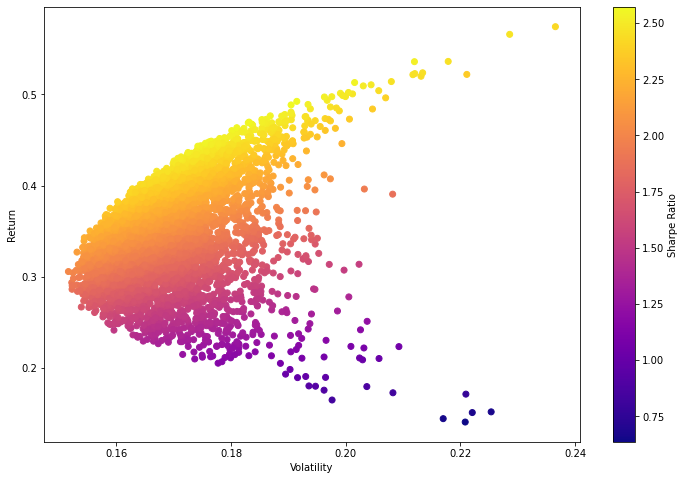

In [19]:
# plot the data
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

In [13]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

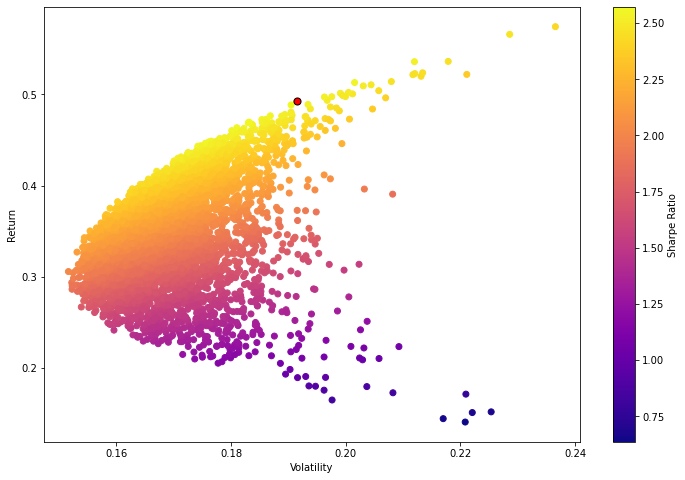

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# add a red dot for max_sr_vol & max_sr_ret
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolors='black')

#### References

In [118]:
# Analogous to System

class System(): 
    
    def __init__(self, stocks, init_capital):
        self.stocks = stocks
        self.init_capital = init_capital
        #self.t0 = stocks.index[0]
        self.t0 = 0
        self.t_end = len(stocks)
        #self.t_end = stocks.index[-1]
        
        weights = np.array(np.random.random(5)) 
        weights = weights/np.sum(weights) 

        self.portfolio = Portfolio(weights, capital = init_capital)
        

In [119]:
# system = System(stocks, 1e6)
# linrange(system.t0, system.t_end)

In [120]:
# Analogous to state
# weights and port_val get update on each iteration
class Portfolio(): 
    
    def __init__(self, weights, capital):
        self.weights = weights  
        self.capital = capital
        

In [121]:
# for ind in range(num_ports): 
    
#     results = run_simulation(system, update_func)

# num_ports = 5000
# all_weights = np.zeros((num_ports, len(stocks.columns)))
# ret_arr = np.zeros(num_ports)
# vol_arr = np.zeros(num_ports)
# sharpe_arr = np.zeros(num_ports)

In [122]:
def make_system(stocks, init_capital):
    """Make a system object for the Portfolio model.
    
    stocks: a dataframe containing with stocks as columns, days as rows and, daily price as value
    init_cap: initial capital of the portfolio
    
    returns: System object
    """
    weights = np.array(np.random.random(5)) 
    weights = weights/np.sum(weights) 
    
    init = Portfolio(weights, capital = init_capital)

    t0 = stocks.index[0]
    t_end = t0 = stocks.index[-1]

    return System(stocks, init=init, t0=t0, t_end=t_end)

In [123]:
def update_func(portfolio, t, system, rebalance=False):
    """Update the portfolio model.
    
    portfolio: Portfolio with variables weights and capital
    t: time step
    system: System with t index
    
    returns: Portfolio object
    """
    # get percentage change for day t
    weight_change = system.stocks.pct_change(1).iloc[t].values.tolist()
    # multiply previous weights with daily chance elementwise
    weights = np.multiply(portfolio.weights, weight_change)  
    # caculate new portfolio value
    port_val = np.sum(weights) * system.init_value  
    
    return Portfolio(weights=weights, capital=port_val)

In [124]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    frame = TimeFrame(columns=system.stocks.index)
    frame.row[system.t0] = system.init_capital
    
    for t in linrange(system.t0, system.t_end):
        port = update_func(frame.row[t], t, system)
        frame.row[t+1] = update_func(frame.row[t], t, port.capital)
        # Append dataframe row
    
    return frame

In [125]:
#system = make_system(stocks, init_cap=1e6)
system = System(stocks, init_capital=1e6)
results = run_simulation(system, update_func)

AttributeError: 'State' object has no attribute 'weights'

In [ ]:
def make_system(beta, gamma):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(S=89, I=1, R=0)
    init /= sum(init)

    t0 = 0
    t_end = 7 * 14

    return System(init=init, t0=t0, t_end=t_end,
                  beta=beta, gamma=gamma)

In [ ]:
def update_func(state, t, system):
    """Update the SIR model.
    
    state: State with variables S, I, R
    t: time step
    system: System with beta and gamma
    
    returns: State object
    """
    s, i, r = state

    infected = system.beta * i * s    
    recovered = system.gamma * i
    
    s -= infected
    i += infected - recovered
    r += recovered
    
    return State(S=s, I=i, R=r)

In [104]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    frame = TimeFrame(columns=system.init.index)
    frame.row[system.t0] = system.init
    
    for t in linrange(system.t0, system.t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

### Log Returns

In [ ]:
# initialize
random.seed(604)
num_ports = 50
init_capital = 1e6
all_weights = np.zeros((num_ports, len(stocks.columns)))
returns = np.zeros(num_ports)
volatility = np.zeros(num_ports)
sharpe = np.zeros(num_ports)
capital = pd.DataFrame(columns = [str(i) for i in range(num_ports)])
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

# Build dataframe that will keep final values
#sim = pd.DataFrame(columns = [porfolio value])

for i in range(num_ports):
    # Build system
    system = System(stock_log_returns, init_capital)
    # Assign random weights
    weights = np.array(np.random.random(len(system.stock_names))) 
    init_weights = weights/np.sum(weights)  
    # Build portfolio
    port = Portfolio(system.stock_names, init_weights, system.init_capital)
    # Initialize series with the original capital
    sim_capital = pd.DataFrame([port.calculate_port_value()])
    
    # Update portfolio holdings daily and record capital
    for t in linrange(system.t0+1, system.t_end):
        daily_returns = system.stock_returns.iloc[t].values.tolist()
        port.update_holdings(daily_returns)
        # Log port_value at time t
        sim_capital = sim_capital.append(pd.Series(port.calculate_port_value()), ignore_index=True)
    
    # Calculate metrics: log mean returns, vol, sharpe
     
    # Log final init_weight, porfolio value, log mean returns, vol, sharpe
    
    #capital = pd.concat([capital, sim_capital], axis=1, join='inner')
    capital[str(i)] = sim_capital[0]
    #pd.concat(stock_frames, axis=1, join='inner')
    # save the weights
    all_weights[i,:] = weights 
    log_returns = np.log(port.holdings/port.holdings.shift(1))
    # expected return 
    ret_arr[i] = np.sum((log_returns.mean()*weights)*252)

    # expected volatility 
    vol_arr[i] = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252, weights)))

    # Sharpe Ratio 
    sharpe_arr[i] = ret_arr[i]/vol_arr[i]